## Центральная предельная теорема своими руками

In [29]:
import numpy as np
from scipy.stats import pareto as p
from scipy.stats import norm as norm
import matplotlib.pyplot as plt
from numpy.random import randint
from numpy.random import seed
from math import sqrt

Генерируем распределение Парето и выборку из 1000 элементов

In [30]:
k = 10
distr = p(k)
samples = distr.rvs(1000)

Text(0, 0.5, 'Плотность')

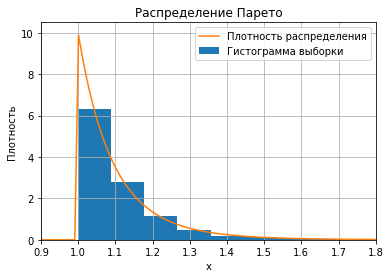

In [32]:
# гистограмма
plt.hist(samples, bins=15, density=True, stacked=True, label='Гистограмма выборки')

# теоретическая функция плотности распределения
x = np.linspace(0,10,1000)
plt.plot(x, distr.pdf(x), label='Плотность распределения')
plt.legend()
plt.grid()
plt.axis([0.9, 1.8, 0, 10.5])
plt.title('Распределение Парето')
plt.xlabel('x')
plt.ylabel('Плотность')

### Подсчет выборочных средних

In [33]:
numSamples = 1000
sampleSize = [5, 10, 50]

#делаем нулевой массив, в который будем складывать выборочные средние
samples = np.zeros((len(sampleSize), numSamples))

#вычисление выборочных средних значений и занесение в массив
for i in np.arange(len(sampleSize)):
    for j in np.arange(numSamples):
        samplesArray = np.array(p.rvs(k, size=sampleSize[i]))
        samplesMean = samplesArray.mean()
        samples[i, j] = samplesMean

### Отрисовка гистограмм выборочных средних

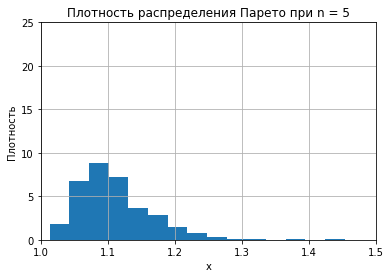

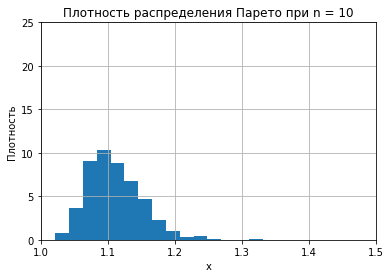

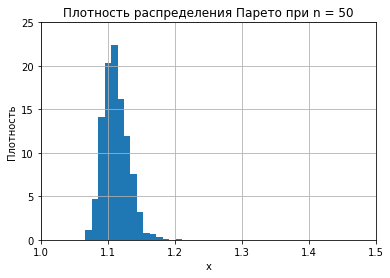

In [34]:
for i in np.arange(len(sampleSize)):
    plt.hist(samples[i], bins=15, density=True, stacked=True)
    plt.grid()
    plt.axis([1, 1.5, 0, 25])
    plt.title('Плотность распределения Парето при n = ' + str(sampleSize[i]))
    plt.xlabel('x')
    plt.ylabel('Плотность')
    plt.show()

### Расчет параметров нормальных распределений

In [35]:
#Рассчитаем матожидание и дисперсию

sampleMean = k / (k - 1)
sampleVar = np.zeros(len(sampleSize))
for i in np.arange(len(sampleSize)):
    sampleVar[i] =  k / (( (k - 1)**2 * (k - 2) ) * sampleSize[i])
    
print('Матожидание: ' + str(sampleMean))
for i in np.arange(len(sampleSize)):
    print('Дисперсия при n = ' + str(sampleSize[i]) + ': ' + str(sampleVar[i]))

Матожидание: 1.1111111111111112
Дисперсия при n = 5: 0.0030864197530864196
Дисперсия при n = 10: 0.0015432098765432098
Дисперсия при n = 50: 0.00030864197530864197


### Отрисовка гистограмм выборочных средних с наложенными нормальными распределениями

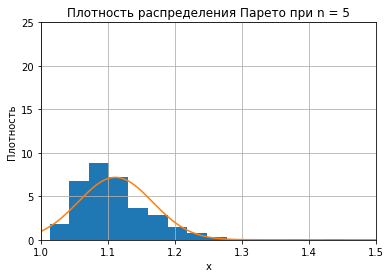

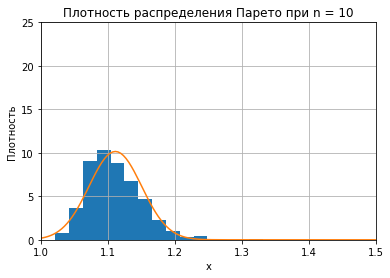

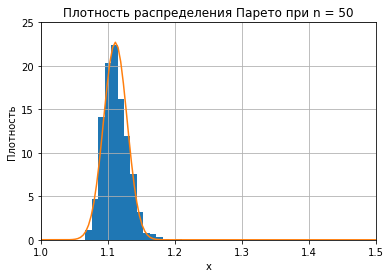

In [36]:
for i in np.arange(len(sampleSize)):
    plt.hist(samples[i], bins=15, density=True, stacked=True)
    plt.grid()
    plt.axis([1, 1.5, 0, 25])
    plt.title('Плотность распределения Парето при n = ' + str(sampleSize[i]))
    plt.xlabel('x')
    plt.ylabel('Плотность')
    
    # нормальное распределение
    m = sampleMean
    s = sqrt(sampleVar[i])
    normDistr = norm(loc=m, scale=s)    
    x = np.linspace(-2,2,1000)
    plt.plot(x, normDistr.pdf(x))
    plt.show()

### Выводы:
- Центральная предельная теорема работает
- При увеличении n гистограмма все больше совпадает с графиком нормального распределения